In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import cv2
import gc
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

In [ ]:
path_to_project = '/content/drive/MyDrive/196.Code_paper_biomedical_signal'

In [ ]:
!cp '{path_to_project}/data/data.zip' /content/data.zip
!unzip /content/data.zip -d /content/

In [ ]:
df_file = pd.read_csv(path_to_project+ '/data/data_img_name.csv')
df_file.head()

,img_path_40x,img_path_100x,img_path_200x,img_path_400x,flag_status,label
0,/content/data/binary_classes/fold1/train/40X/B...,/content/data/binary_classes/fold1/train/100X/...,/content/data/binary_classes/fold1/train/200X/...,/content/data/binary_classes/fold1/train/400X/...,train,0
1,/content/data/binary_classes/fold1/train/40X/B...,/content/data/binary_classes/fold1/train/100X/...,/content/data/binary_classes/fold1/train/200X/...,/content/data/binary_classes/fold1/train/400X/...,train,0
2,/content/data/binary_classes/fold1/train/40X/B...,/content/data/binary_classes/fold1/train/100X/...,/content/data/binary_classes/fold1/train/200X/...,/content/data/binary_classes/fold1/train/400X/...,train,0
3,/content/data/binary_classes/fold1/train/40X/B...,/content/data/binary_classes/fold1/train/100X/...,/content/data/binary_classes/fold1/train/200X/...,/content/data/binary_classes/fold1/train/400X/...,train,0
4,/content/data/binary_classes/fold1/train/40X/B...,/content/data/binary_classes/fold1/train/100X/...,/content/data/binary_classes/fold1/train/200X/...,/content/data/binary_classes/fold1/train/400X/...,train,0


In [ ]:
df_train, df_test = train_test_split(df_file, test_size=0.2, random_state=42)
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [ ]:
img_train = []
label_train = []

for i in range(0, len(df_train)):
    img_4_type_tmp = []
    img_40 = cv2.imread(df_train['img_path_40x'][i])
    img_100 = cv2.imread(df_train['img_path_100x'][i])
    img_200 = cv2.imread(df_train['img_path_200x'][i])
    img_400 = cv2.imread(df_train['img_path_400x'][i])

    img_4_type_tmp.append(img_40)
    img_4_type_tmp.append(img_100)
    img_4_type_tmp.append(img_200)
    img_4_type_tmp.append(img_400)

    img_train.append(img_4_type_tmp)
    label_train.append(df_train['label'][i])
label_train = np.array(label_train)

In [ ]:
img_test = []
label_test = []

for i in range(0, len(df_test)):
    img_4_type_tmp = []
    img_40 = cv2.imread(df_test['img_path_40x'][i])
    img_100 = cv2.imread(df_test['img_path_100x'][i])
    img_200 = cv2.imread(df_test['img_path_200x'][i])
    img_400 = cv2.imread(df_test['img_path_400x'][i])

    img_4_type_tmp.append(img_40)
    img_4_type_tmp.append(img_100)
    img_4_type_tmp.append(img_200)
    img_4_type_tmp.append(img_400)

    img_test.append(img_4_type_tmp)
    label_test.append(df_test['label'][i])
label_test = np.array(label_test)

In [ ]:
del img_40, img_100, img_200, img_400
gc.collect()

51

In [ ]:
len(img_train)

1246

In [ ]:
len(label_train)

1246

In [ ]:
def preprocess_image(image):
    # Bước 1: Thay đổi kích thước thành 128x128
    image = cv2.resize(image, (128, 128))
    # Bước 2: Chuyển sang không gian màu HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Áp dụng cân bằng lược đồ cho kênh V
    h, s, v = cv2.split(image_hsv)
    v_equalized = cv2.equalizeHist(v)
    image_hsv_equalized = cv2.merge((h, s, v_equalized))
    # Chuyển lại sang không gian màu BGR
    image = cv2.cvtColor(image_hsv_equalized, cv2.COLOR_HSV2BGR)

    return image

def preprocess_data(data):
    preprocessed_data = []
    for image in data:
        preprocessed_image = preprocess_image(image)
        preprocessed_data.append(preprocessed_image)
    return preprocessed_data

img_train= np.array(img_train)
preprocessed_train_dataset = []
for i in range(img_train.shape[0]):
    preprocessed_image = preprocess_data(img_train[i])
    preprocessed_train_dataset.append(preprocessed_image)
preprocessed_train_dataset = np.array(preprocessed_train_dataset)

<ipython-input-12-868d21fb453e>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img_train= np.array(img_train)


In [ ]:
img_test= np.array(img_test)
preprocessed_test_dataset = []
for i in range(img_test.shape[0]):
    preprocessed_image = preprocess_data(img_test[i])
    preprocessed_test_dataset.append(preprocessed_image)
preprocessed_test_dataset = np.array(preprocessed_test_dataset)

<ipython-input-13-c309a448be9a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img_test= np.array(img_test)


In [ ]:
del img_train
gc.collect()

0

In [ ]:
x_train_40 = []
x_train_100 = []
x_train_200 = []
x_train_400 = []

for i in range(0, len(preprocessed_train_dataset)):
    x_train_40.append(preprocessed_train_dataset[i][0])
    x_train_100.append(preprocessed_train_dataset[i][1])
    x_train_200.append(preprocessed_train_dataset[i][2])
    x_train_400.append(preprocessed_train_dataset[i][3])

x_train_40=np.array(x_train_40)
x_train_100=np.array(x_train_100)
x_train_200=np.array(x_train_200)
x_train_400=np.array(x_train_400)

In [ ]:
x_test_40 = []
x_test_100 = []
x_test_200 = []
x_test_400 = []

for i in range(0, len(preprocessed_test_dataset)):
    x_test_40.append(preprocessed_test_dataset[i][0])
    x_test_100.append(preprocessed_test_dataset[i][1])
    x_test_200.append(preprocessed_test_dataset[i][2])
    x_test_400.append(preprocessed_test_dataset[i][3])

x_test_40=np.array(x_test_40)
x_test_100=np.array(x_test_100)
x_test_200=np.array(x_test_200)
x_test_400=np.array(x_test_400)

In [ ]:
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, concatenate, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.optimizers import Lion, Adam

# Define four sets of inputs
input_size = (128, 128, 3)
input_40X = Input(shape=input_size)
input_100X = Input(shape=input_size)
input_200X = Input(shape=input_size)
input_400X = Input(shape=input_size)

# Create shared EfficientNetB0 model for one input
effnet_model = EfficientNetV2S(input_shape=input_size, weights='imagenet', include_top=False)

# Extract features from each EfficientNetB0 model
features_40X = effnet_model(input_40X)
features_100X = effnet_model(input_100X)
features_200X = effnet_model(input_200X)
features_400X = effnet_model(input_400X)

# Concatenate the features from all four models
combined = concatenate([features_40X, features_100X, features_200X, features_400X])

flattened = Flatten()(combined)

# Apply additional Fully Connected (FC) layers as needed
x = Dense(256, activation='relu')(flattened)
x = Dropout(0.5)(x)  # Dropout layer after the first Dense layer
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer after the second Dense layer
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

optimizer = Lion(learning_rate=1e-4)
# optimizer = Adam(learning_rate=1e-3)
# Create the final model with four inputs and FC layers
model = Model(inputs=[input_40X, input_100X, input_200X, input_400X], outputs=output)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Định nghĩa callback EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # the quantity to be monitored (in this case, validation loss)
    patience=30,  # number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # restore model weights from the epoch with the best value of the monitored quantity
    verbose=1  # print messages about the early stopping to the console
)

In [ ]:
history = model.fit(
    [x_train_40, x_train_100, x_train_200, x_train_400],
    label_train,
    epochs=100,  # Số lượng epochs (vòng lặp) huấn luyện
    batch_size=16,
    validation_split=0.2,  # Phần trăm dữ liệu dành cho validation set
    callbacks=[early_stopping_callback]  # Thêm callback EarlyStopping vào quá trình huấn luyện
)

Epoch 1/100
63/63 [==============================] - 138s 600ms/step - loss: 0.8663 - accuracy: 0.6225 - val_loss: 0.4638 - val_accuracy: 0.7880
Epoch 2/100
63/63 [==============================] - 25s 398ms/step - loss: 0.9094 - accuracy: 0.7470 - val_loss: 0.4608 - val_accuracy: 0.7920
Epoch 3/100
63/63 [==============================] - 25s 405ms/step - loss: 0.6474 - accuracy: 0.8243 - val_loss: 0.2011 - val_accuracy: 0.9400
Epoch 4/100
63/63 [==============================] - 25s 399ms/step - loss: 0.5811 - accuracy: 0.8845 - val_loss: 0.1384 - val_accuracy: 0.9480
Epoch 5/100
63/63 [==============================] - 25s 395ms/step - loss: 0.7337 - accuracy: 0.8635 - val_loss: 0.1950 - val_accuracy: 0.9240
Epoch 6/100
63/63 [==============================] - 25s 400ms/step - loss: 0.5320 - accuracy: 0.8725 - val_loss: 0.1199 - val_accuracy: 0.9640
Epoch 7/100
63/63 [==============================] - 25s 394ms/step - loss: 0.5577 - accuracy: 0.9096 - val_loss: 0.2647 - val_accuracy

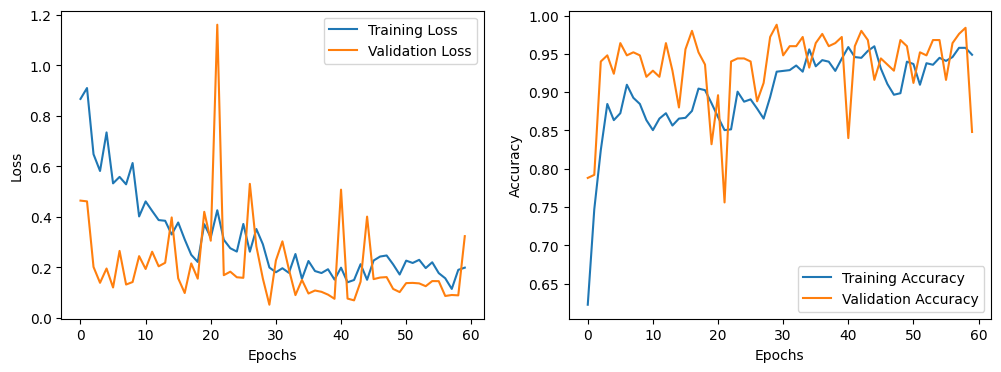

In [ ]:
import matplotlib.pyplot as plt

# Vẽ đồ thị loss và accuracy trên tập huấn luyện và validation
plt.figure(figsize=(12, 4))

# Vẽ đồ thị loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Hiển thị đồ thị
plt.show()

In [ ]:
model.save(path_to_project + "/model/Model_80-20_Lion-EfficientNetV2S.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def model_validation(model):
  y_pred = model.predict([x_test_40, x_test_100, x_test_200, x_test_400])
  label_pred = (np.array(y_pred) >= 0.5).astype(int)
  precision_val = precision_score(label_test, label_pred)
  recall_val = recall_score(label_test, label_pred)
  f1_score_val = f1_score(label_test, label_pred)
  accuracy_val = accuracy_score(label_test, label_pred)
  mcc_val = matthews_corrcoef(label_test, label_pred)

  print(f"Precision: {precision_val}")
  print(f"Recall: {recall_val}")
  print(f"F1-Score: {f1_score_val}")
  print(f"Accuracy: {accuracy_val}")
  print(f"Matthews Correlation Coefficient: {mcc_val}")

  # Tính và vẽ ma trận nhầm lẫn
  cm = confusion_matrix(label_test, label_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
  disp.plot(cmap=plt.cm.Blues, values_format='.2f')
  plt.title('Confusion Matrix')
  plt.show()

  # Tính đường cong ROC
  fpr, tpr, _ = roc_curve(label_test, y_pred)
  # Tính diện tích dưới đường cong ROC (AUC)
  roc_auc = auc(fpr, tpr)
  # Vẽ đường cong ROC
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([-0.05, 1.0])
  plt.ylim([-0.05, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")

10/10 [==============================] - 2s 169ms/step
Precision: 0.9720930232558139
Recall: 0.9858490566037735
F1-Score: 0.9789227166276346
Accuracy: 0.9711538461538461
Matthews Correlation Coefficient: 0.9334757102395509


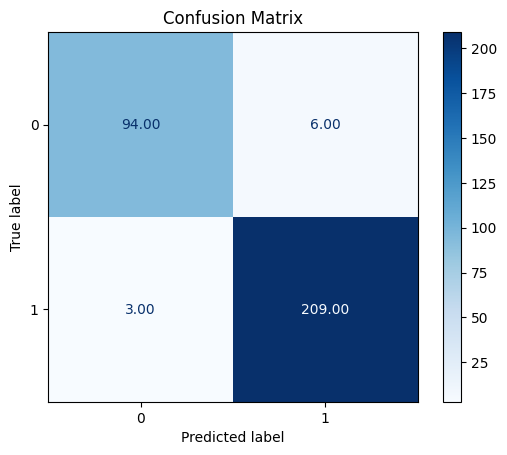

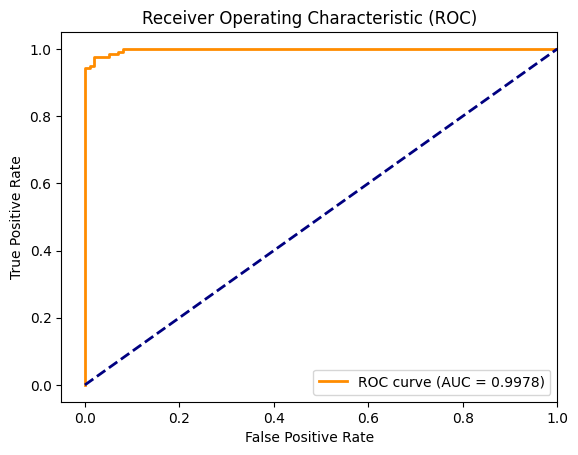

In [ ]:
model_validation(model)